In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.gridspec as gridspec
import corner
import matplotlib.gridspec as grid
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style("ticks")

sns.set_context("paper", font_scale=0.7)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['xtick.major.size'] = 1.5
plt.rcParams['ytick.major.size'] = 1.5
outdir = '/Users/christof/dstrf/output/'
est_clr = ["darkcyan", "cyan", "goldenrod","gold"]

In [2]:
os.chdir('/Users/christof/dstrf')
timedistort = pd.read_csv('TimePeakDistortionFigures/TimePeak.csv',header=None)
paradf = pd.read_csv('Params.csv')

In [3]:
timedistort = timedistort.rename(columns={0:"True_Max_Freq",
                            1:"Expected_Max_Freq",
                            2:"Estimated_Max_Freq",
                            3:"True_Pwr_Diff",
                            4:"Expected_Pwr_Diff",
                            5:"Estimated_Pwr_Diff",
                            6:"True_Bandpass",
                            7:"Expected_Bandpass",
                            8:"Estimated_Bandpass",
                            9:"RF",
                            10:"Model"})
timedistort["delta_l"] = timedistort['True_Bandpass']-timedistort['Estimated_Bandpass']
timedata = timedistort[["delta_l","RF","Model"]]
paradf=paradf.rename(columns={"Type":"Model"})
data = pd.merge(paradf,timedata,on = ["RF","Model"])

In [4]:
phasic = data[:]["Model"] =="phasic"
tonic = data[:]["Model"] =="tonic"
Pt_0 = data[:]["Pt"] == 0
Pt_pi2 = data[:]["Pt"] != 0

In [5]:
phasic_0 = data[(data[:]["Pt"] == 0) & (data[:]["Model"] == "phasic")]
phasic_2 = data[(data[:]["Pt"] != 0) & (data[:]["Model"] == "phasic")]
tonic_0 = data[(data[:]["Pt"] == 0) & (data[:]["Model"] == "tonic")]
tonic_2 = data[(data[:]["Pt"] != 0) & (data[:]["Model"] == "tonic")]

([<matplotlib.axis.XTick at 0x110ad0390>,
 <a list of 6 Text xticklabel objects>)

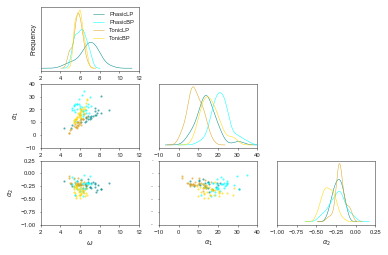

In [6]:
gs = gridspec.GridSpec(3, 3)

#Define paramter ranges
omega_ticks = [2,4,6,8,10,12]
a1_ticks = [-10,0,10,20,30,40]
a2_ticks = [-1,-.75,-.5,-.25,0,.25]


#Omega
ax1 = plt.subplot(gs[0, 0])
phasic_0["Omega"].plot(kind="density",color=est_clr[0])
phasic_2["Omega"].plot(kind="density",color=est_clr[1])
tonic_0["Omega"].plot(kind="density",color=est_clr[2])
tonic_2["Omega"].plot(kind="density",color=est_clr[3])
plt.legend(("PhasicLP","PhasicBP","TonicLP", "TonicBP"), framealpha = 0, loc = "upper right", fontsize = "xx-small")
plt.ylabel("Frequency")
plt.xticks(omega_ticks, fontsize = 6)
plt.yticks([])
plt.xlim([min(omega_ticks),max(omega_ticks)])

#Alpha1
ax2 = plt.subplot(gs[1,1])
phasic_0["Alpha1"].plot(kind="density",color=est_clr[0])
phasic_2["Alpha1"].plot(kind="density",color=est_clr[1])
tonic_0["Alpha1"].plot(kind="density",color=est_clr[2])
tonic_2["Alpha1"].plot(kind="density",color=est_clr[3])
plt.ylabel("")
plt.xlim([min(a1_ticks),max(a1_ticks)])
plt.xticks(a1_ticks, fontsize = 6)
plt.yticks([])

#Alpha2
ax3 = plt.subplot(gs[2,2])
phasic_0["Alpha2"].plot(kind="density",color=est_clr[0])
phasic_2["Alpha2"].plot(kind="density",color=est_clr[1])
tonic_0["Alpha2"].plot(kind="density",color=est_clr[2])
tonic_2["Alpha2"].plot(kind="density",color=est_clr[3])
plt.xlabel(r"$\alpha_2$")
plt.ylabel("")
plt.yticks([])
plt.xticks(a2_ticks,fontsize = 6)
plt.xlim([min(a2_ticks),max(a2_ticks)])

#Omega-Alpha1
ax4 = plt.subplot(gs[1, 0])

plt.scatter(phasic_0["Omega"],
            phasic_0["Alpha1"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Omega"],
            phasic_2["Alpha1"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Omega"],
            tonic_0["Alpha1"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Omega"],
            tonic_2["Alpha1"],alpha = 0.5, s = 2,color=est_clr[3])

plt.ylabel(r"$\alpha_1$")
plt.xticks(omega_ticks, fontsize = 6)
plt.yticks(a1_ticks, fontsize = 6)

#Omega-Alpha2
ax5 = plt.subplot(gs[2, 0])

plt.scatter(phasic_0["Omega"],
            phasic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Omega"],
            phasic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Omega"],
            tonic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Omega"],
            tonic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[3])

plt.xlabel("$\omega$")
plt.ylabel(r"$\alpha_2$")
plt.xticks(omega_ticks, fontsize = 6)
plt.yticks(a2_ticks,fontsize = 6)

#Alpha1-Alpha2
ax6 = plt.subplot(gs[2,1])

plt.scatter(phasic_0["Alpha1"],
            phasic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[0])
plt.scatter(phasic_2["Alpha1"],
            phasic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[1])
plt.scatter(tonic_0["Alpha1"],
            tonic_0["Alpha2"],alpha = 0.5,s = 2,color=est_clr[2])
plt.scatter(tonic_2["Alpha1"],
            tonic_2["Alpha2"],alpha = 0.5, s = 2,color=est_clr[3])

plt.xlabel(r"$\alpha_1$")
plt.yticks(a2_ticks,fontsize = 0)
plt.xticks(a1_ticks, fontsize = 6)
#plt.savefig(os.path.join(outdir, "parameters_phi_corner.pdf"))

In [123]:
def param_RM(data):
    params = ["Omega","Alpha1","Alpha2"]
    est_clr = ["#148B8B", "#D9A522"]
    data["pt"] = data["Pt"]
    offset = (-0.2)
    for i in range(len(data["Pt"])):
        if data["Model"][i] == "phasic":
            data["pt"][i] = data["Pt"][i]-offset
        else:
            data["pt"][i] = data["Pt"][i]+offset
    #Seperates by Model
    phasic = data["Model"] == "phasic"
    tonic = data["Model"] == "tonic"

    #Seperates the types by rotation parameter

    phasic_0 = (data["Model"]=="phasic")&(data["Pt"]==0)
    phasic_pi2 = (data["Model"]=="phasic")&(data["Pt"]!=0)

    tonic_0 = (data["Model"]=="tonic")&(data["Pt"]==0)
    tonic_pi2 = (data["Model"]=="tonic")&(data["Pt"]!=0)

    for j in range(len(params)):
        
        # Define y labels
        ylabels = ['$\omega$',r'$\alpha_1$',r'$\alpha_2$']
        #Define paramter ticks
        omega_ticks = [4,5,6,7,8,9,10]
        a1_ticks = [0,6,12,18,24,30,36]
        a2_ticks = [-.6,-.5,-.4,-.3,-.2,-.1,0]
        ticks = [omega_ticks,a1_ticks,a2_ticks]
        
        #Define parameter ranges
        omega_ranges = [3.92,10]
        a1_ranges = [-1.02,36]
        a2_ranges = [-.612,0]
        ranges = [omega_ranges,a1_ranges,a2_ranges]
        
        
        #Gets the mean of Exp-Est_freq by phi parameter

        ph_0 = np.mean(data[phasic_0][params[j]])
        ph_pi2 = np.mean(data[phasic_pi2][params[j]])

        tc_0 = np.mean(data[tonic_0][params[j]])
        tc_pi2 = np.mean(data[tonic_pi2][params[j]])
        
        fig, ax = plt.subplots()
        ax.set(xlabel='Temporal Profile ($\Omega_t$)',ylabel = params[j])

        #Plot phasic delta_l and means
        ax.scatter(data[:]["Pt"][phasic]-offset,data[:][params[j]][phasic],alpha=0.5,label="phasic",color=est_clr[0])
        #ax.plot([-offset,(np.pi/2)-offset],[ph_0,ph_pi2],linestyle="--",dashes=(5,5),linewidth = 2,color=est_clr[0])
        ax.plot([-offset], [ph_0], marker='o', markersize=10, color=est_clr[0],alpha = 0.5)
        ax.plot([-offset], [ph_0], marker='.', markersize=5, color="black")
        ax.plot([(np.pi/2)-offset], [ph_pi2], marker='o', markersize=10, color=est_clr[0],alpha = 0.5)
        ax.plot([(np.pi/2)-offset], [ph_pi2], marker='.', markersize=5, color="black")

        #Plot tonic delta_l and means
        ax.scatter(data[:]["Pt"][tonic]+offset,data[:][params[j]][tonic],alpha=0.5,label="tonic",color=est_clr[1])
        #ax.plot([offset,(np.pi/2)+offset],[tc_0,tc_pi2],linestyle="--",dashes=(5,5),linewidth = 2,color=est_clr[1])
        ax.plot([offset], [tc_0], marker='o', markersize=10, color=est_clr[1],alpha = 0.5)
        ax.plot([offset], [tc_0], marker='.', markersize=5, color="black")
        ax.plot([(np.pi/2)+offset], [tc_pi2], marker='o', markersize=10, color=est_clr[1],alpha = 0.5)
        ax.plot([(np.pi/2)+offset], [tc_pi2], marker='.', markersize=5, color="black")
        
        #Means by phase
        ax.plot([offset,-offset],[tc_0,ph_0],
                linestyle = "--",dashes = (3,4),linewidth = 2, color = "black", alpha = 0.7)
        
        ax.plot([(np.pi/2)+offset,(np.pi/2)-offset],[tc_pi2,ph_pi2],
                linestyle = "--",dashes = (3,4),linewidth = 2, color = "black", alpha = 0.7)


        #Plot repeated measures data
        for i in range(59):
            x1,x2 = data.loc[data["RF"]==i+1]["pt"]
            y1,y2 = data.loc[data["RF"]==i+1][params[j]]
            ax.plot([x1,x2],[y1,y2],linestyle="--",dashes=(5,5),color="black",alpha=0.4)

        #Figure Params
        plt.legend(loc="upper left")
        ax.set_xlim([2*offset,(np.pi/2)-2*offset])
        ax.set_ylim(ranges[j])
        plt.yticks(ticks[j])
        ax.set_ylabel(ylabels[j])
        plt.setp(ax, xticks=[0,np.pi/2], xticklabels=['0',r'$\frac{\pi}{2}$'])
        fig.set_figwidth(3.5)
        fig.set_figheight(6.5)
        plt.savefig(os.path.join(outdir, "Fig5_{0}.pdf".format(params[j])))

/anaconda3/envs/dstrf/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/dstrf/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


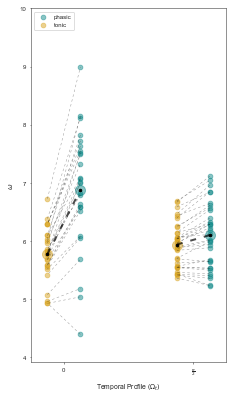

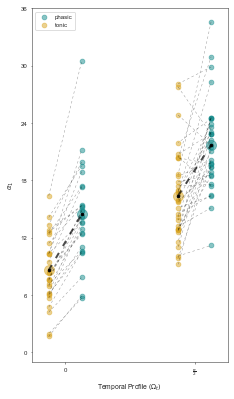

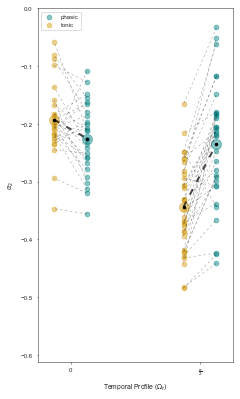

In [124]:
param_RM(data)

In [125]:
omega_ticks = [4,5,6,7,8,9]
a1_ticks = [0,10,20,30,40]
a2_ticks = [-.75,-.5,-.25,0,.25]
ticks = [omega_ticks,a1_ticks,a2_ticks]

In [54]:
ticks[2][0]

-0.75